# Proyek Analisis Data: Bike Sharing
- **Nama:** Muhammad Rian Tirta Nugraha
- **Email:** riantn0203@gmail.com
- **ID Dicoding:** riantn

## Menentukan Pertanyaan Bisnis

- Musim manakah dengan tingkat penyewaan sepeda tertinggi?
- Bagaimana performa penyewaan sepeda tahun 2011 dan 2012?

## Import Semua Packages/Library yang Digunakan

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [96]:
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

### Assessing Data

Memeriksa data type

In [97]:
#Memeriksa data type
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

Memeriksa data yang kosong

In [98]:
#Memeriksa data yang kosong
day_df.isna().sum()
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Memeriksa data yang duplikasi

In [99]:
#Memeriksa data yang duplikasi
print("Jumlah duplikasi data day: ", day_df.duplicated().sum())
print("Jumlah duplikasi data hour: ", hour_df.duplicated().sum())

Jumlah duplikasi data day:  0
Jumlah duplikasi data hour:  0


### Cleaning Data

Mengubah type data dteday menjadi datetime

In [100]:
#Memperbaiki type data
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])
  hour_df[column] = pd.to_datetime(hour_df[column])

In [101]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

##### Tampilan rangkuman parameter statistik

In [102]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [103]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


#### Penyewaan sepeda tertinggi dan terendah  (sum up casual and registered)

In [104]:
print("Jumlah cnt paling tinggi: ",day_df.cnt.max())
print("Jumlah cnt paling rendah: ",day_df.cnt.min())

Jumlah cnt paling tinggi:  8714
Jumlah cnt paling rendah:  22


#### Tanggal penyewaan sepeda tertinggi dan terendah

In [105]:
highest_rent_byday = day_df.sort_values(by="cnt", ascending=False)[["dteday", "cnt"]]
highest_rent_byday.head(5)

,dteday,cnt
623,2012-09-15,8714
637,2012-09-29,8555
630,2012-09-22,8395
447,2012-03-23,8362
504,2012-05-19,8294


In [106]:
lowest_rent_byday = day_df.sort_values(by="cnt", ascending=True)[["dteday", "cnt"]]
lowest_rent_byday.head(5)

,dteday,cnt
667,2012-10-29,22
26,2011-01-27,431
725,2012-12-26,441
25,2011-01-26,506
64,2011-03-06,605


#### Penyewaan sepeda tertinggi dan terendah berdasarkan musim

In [107]:
day_df.groupby(by="season").agg({
    "registered" : ["max", "min"],
    "casual" : ["max", "min"],
    "cnt": ["max", "min"]
})

registered      casual        cnt      
              max  min    max  min   max   min
season                                        
1            5315  416   3155    9  7836   431
2            6456  674   3410  120  8362   795
3            6917  889   3160  118  8714  1115
4            6946   20   3031    2  8555    22

#### Jumlah penyewaan sepeda berdasarkan musim tahun 2011

In [108]:
#filter tahun 2011
year_2011_df = day_df[day_df['yr'] == 0]

season_rentals_2011 = year_2011_df.groupby('season')['cnt'].sum().reset_index()
season_rentals_2011['season'] = season_rentals_2011['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
season_rentals_2011.head()

,season,cnt
0,Spring,150000
1,Summer,347316
2,Fall,419650
3,Winter,326137


#### Jumlah penyewaan sepeda berdasarkan musim tahun 2012

In [109]:
#filter tahun 2012
year_2012_df = day_df[day_df['yr'] == 1]

season_rentals_2012 = year_2012_df.groupby('season')['cnt'].sum().reset_index()
season_rentals_2012['season'] = season_rentals_2012['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
season_rentals_2012.head()

,season,cnt
0,Spring,321348
1,Summer,571273
2,Fall,641479
3,Winter,515476


In [110]:
season_rentals = day_df.groupby('season')['cnt'].sum().reset_index()
season_rentals['season'] = season_rentals['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
season_rentals.head()

,season,cnt
0,Spring,471348
1,Summer,918589
2,Fall,1061129
3,Winter,841613


#### Jumlah penyewaan sepeda berdasarkan hari kerja dan hari libur/weekend

In [111]:
workday_rentals = day_df.groupby('workingday')['cnt'].sum().reset_index()
workday_rentals['workingday'] = workday_rentals['workingday'].map({0: 'Holiday/Weekend', 1: 'Working Day'})
workday_rentals.head()


,workingday,cnt
0,Holiday/Weekend,1000269
1,Working Day,2292410


#### Jumlah penyewaan sepeda tahun 2011 dalam setiap bulan

In [112]:
#filter tahun 2011
year_2011_df = day_df[day_df['yr'] == 0]


month_rentals_2011 = year_2011_df.groupby('mnth')['cnt'].sum().reset_index()
month_rentals_2011.head(12)

,mnth,cnt
0,1,38189
1,2,48215
2,3,64045
3,4,94870
4,5,135821
5,6,143512
6,7,141341
7,8,136691
8,9,127418
9,10,123511


#### Jumlah penyewaan sepeda tahun 2012 dalam setiap bulan

In [113]:
#filter tahun 2012
year_2012_df = day_df[day_df['yr'] == 1]


month_rentals_2012 = year_2012_df.groupby('mnth')['cnt'].sum().reset_index()
month_rentals_2012.head()

,mnth,cnt
0,1,96744
1,2,103137
2,3,164875
3,4,174224
4,5,195865


#### Jumlah penyewaan sepeda 2011 vs 2012

In [114]:
year_rentals = day_df.groupby('yr')['cnt'].sum().reset_index()
year_rentals['yr'] = year_rentals['yr'].map({0: '2011', 1: '2012'})
year_rentals.head()

,yr,cnt
0,2011,1243103
1,2012,2049576


## Visualization & Explanatory Analysis

### Pertanyaan 1:

#### Musim manakah dengan tingkat penyewaan sepeda tertinggi?

In [115]:
# Define by Tahun
year_2011_df = day_df[day_df['yr'] == 0]
year_2012_df = day_df[day_df['yr'] == 1]

# Define by Season
season_rentals_2011 = year_2011_df.groupby('season')['cnt'].sum().reset_index()
season_rentals_2011['season'] = season_rentals_2011['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

season_rentals_2012 = year_2012_df.groupby('season')['cnt'].sum().reset_index()
season_rentals_2012['season'] = season_rentals_2012['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})


<ipython-input-116-4004d8678858>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="cnt", x="season", data=season_rentals_2011.sort_values(by="cnt", ascending=False), palette=colors, ax=ax[0])
<ipython-input-116-4004d8678858>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="cnt", x="season", data=season_rentals_2012.sort_values(by="cnt", ascending=False), palette=colors, ax=ax[1])


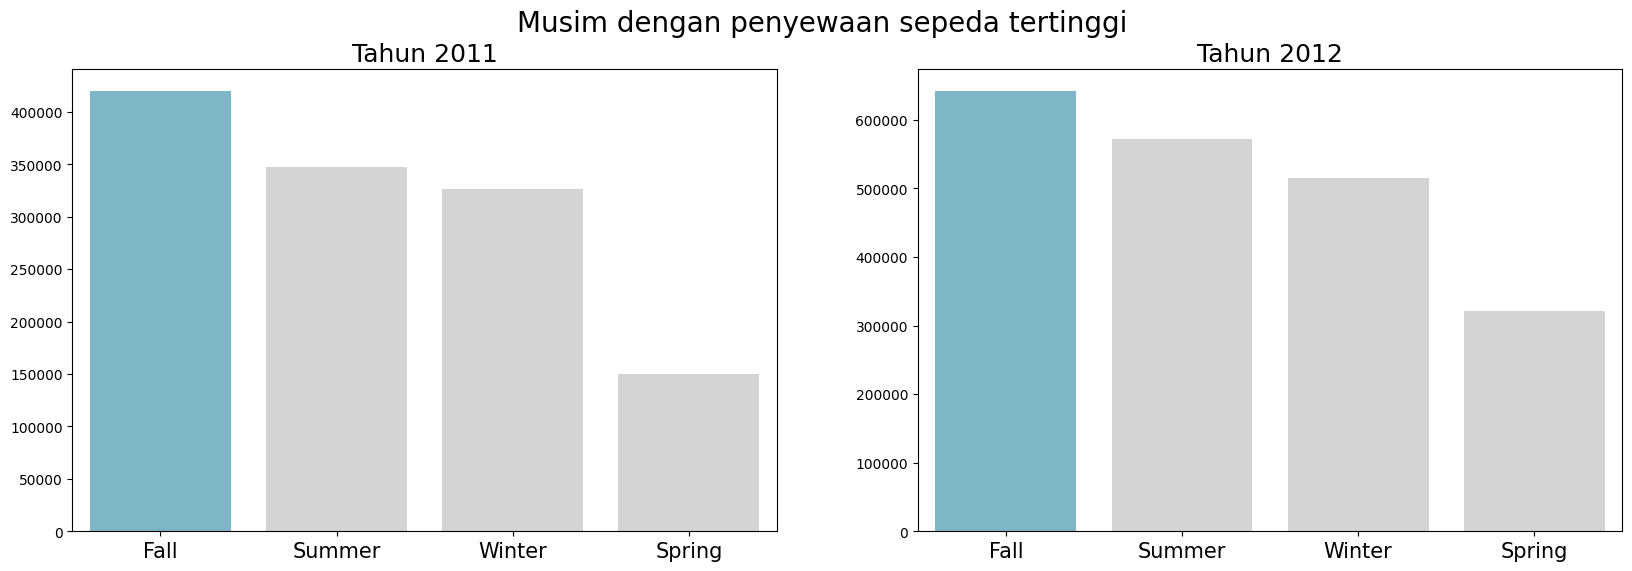

In [116]:
# Data Visualisasi
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(y="cnt", x="season", data=season_rentals_2011.sort_values(by="cnt", ascending=False), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Tahun 2011", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="cnt", x="season", data=season_rentals_2012.sort_values(by="cnt", ascending=False), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Tahun 2012", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

plt.suptitle("Musim dengan penyewaan sepeda tertinggi", fontsize=20)
plt.show()



### Pertanyaan 2:

#### Bagaimana performa penyewaan sepeda tahun 2011 dan 2012?






Menganalisis dengan pendekatan RFM
*   Recency : Date/hari terakhir dan average penyewaan by hari terakhir
*   Frequency : Bulan dan average penyewaan sepeda by bulan terakhir
*   Monetary : Tahun dan average penyewaan sepeda by tahun

#####Recency tahun 2011, Frequency tahun 2011, dan monetary perbandingan 2011 dan 2012

In [117]:
# Define by tahun 2011
year_2011_df = day_df[day_df['yr'] == 0]
# Define by bulan
month_2011_df = year_2011_df[['mnth', 'cnt']].groupby("mnth").sum().reset_index()


# Recency
recent_days_2011 = year_2011_df.sort_values(by="dteday", ascending=False)[["dteday", "cnt"]].head()
print("Total by recent day", recent_days_2011.cnt.sum())
print("Average by recent days", recent_days_2011.cnt.mean())

# Frequency
recent_months_2011 = month_2011_df.sort_values(by="mnth", ascending=False).head(4)
recent_months_2011['mnth'] = recent_months_2011['mnth'].map({9: "Sept", 10: "Okt", 11: "Nov", 12: "Des"})
print("Total by months", recent_months_2011.cnt.sum())
print("Average by months", recent_months_2011.cnt.mean())

# Monetary
years_rental = day_df.groupby('yr')['cnt'].sum().reset_index()
years_rental['yr'] = years_rental['yr'].map({0: '2011', 1: '2012'})
print("Total by Years", years_rental.cnt.sum())
print("Average by Years", years_rental.cnt.mean())


Total by recent day 11371
Average by recent days 2274.2
Total by months 440419
Average by months 110104.75
Total by Years 3292679
Average by Years 1646339.5


<ipython-input-118-e13912895e08>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="cnt", x="dteday", data=recent_days_2011.sort_values(by="dteday", ascending=True), palette=colors_recency, ax=ax[0])
<ipython-input-118-e13912895e08>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="cnt", x="mnth", data=recent_months_2011.sort_values(by="mnth", ascending=False), palette=colors_Frequency, ax=ax[1])
<ipython-input-118-e13912895e08>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="cnt", x="yr", data=years_rental.sort_values(by="yr", asce

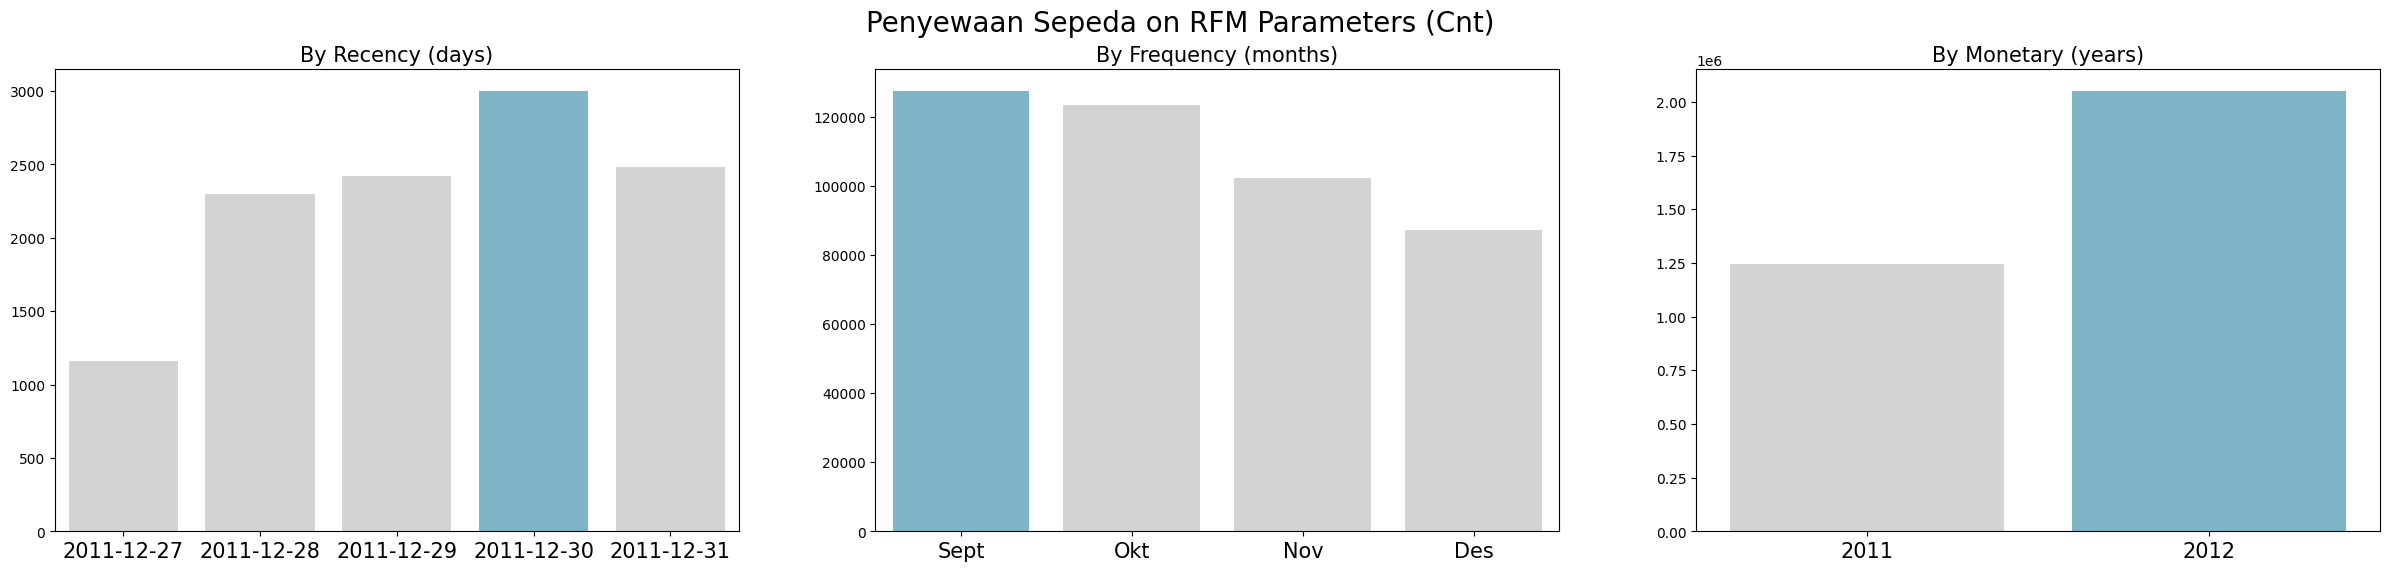

In [118]:
# Data Visualisasi
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
colors_recency = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3"]
colors_Frequency = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
colors_Monetary = ["#D3D3D3", "#72BCD4"]

# Recency
sns.barplot(y="cnt", x="dteday", data=recent_days_2011.sort_values(by="dteday", ascending=True), palette=colors_recency, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=15)
ax[0].tick_params(axis ='x', labelsize=15)

# Frequency
sns.barplot(y="cnt", x="mnth", data=recent_months_2011.sort_values(by="mnth", ascending=False), palette=colors_Frequency, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency (months)", loc="center", fontsize=15)
ax[1].tick_params(axis='x', labelsize=15)

# Monetary
sns.barplot(y="cnt", x="yr", data=years_rental.sort_values(by="yr", ascending=True), palette=colors_Monetary, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary (years)", loc="center", fontsize=15)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Penyewaan Sepeda on RFM Parameters (Cnt)", fontsize=20)
plt.show()

#####Recency tahun 2012, Frequency tahun 2012, dan monetary perbandingan 2011 dan 2012

In [119]:
# Define by tahun 2012
year_2012_df = day_df[day_df['yr'] == 1]
# Define by bulan
month_2012_df = year_2012_df[['mnth', 'cnt']].groupby("mnth").sum().reset_index()


# Recency
recent_days_2012 = year_2012_df.sort_values(by="dteday", ascending=False)[["dteday", "cnt"]].head()
print("Total by recent day", recent_days_2012.cnt.sum())
print("Average by recent day", recent_days_2012.cnt.mean())


# Frequency
recent_months_2012 = month_2012_df.sort_values(by="mnth", ascending=False).head(4)
recent_months_2012['mnth'] = recent_months_2012['mnth'].map({9: "Sept", 10: "Okt", 11: "Nov", 12: "Des"})
print("Total by months", recent_months_2012.cnt.sum())
print("Average by months", recent_months_2012.cnt.mean())

# Monetary
years_rental = day_df.groupby('yr')['cnt'].sum().reset_index()
years_rental['yr'] = years_rental['yr'].map({0: '2011', 1: '2012'})
print("Total by Years", years_rental.cnt.sum())
print("Average by Years", years_rental.cnt.mean())



Total by recent day 11075
Average by recent day 2215.0
Total by months 693791
Average by months 173447.75
Total by Years 3292679
Average by Years 1646339.5


<ipython-input-120-5450f9dcdf36>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="cnt", x="dteday", data=recent_days_2012.sort_values(by="dteday", ascending=True), palette=colors_recency, ax=ax[0])
<ipython-input-120-5450f9dcdf36>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="cnt", x="mnth", data=recent_months_2012.sort_values(by="mnth", ascending=False), palette=colors_Frequency, ax=ax[1])
<ipython-input-120-5450f9dcdf36>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="cnt", x="yr", data=years_rental.sort_values(by="yr", asce

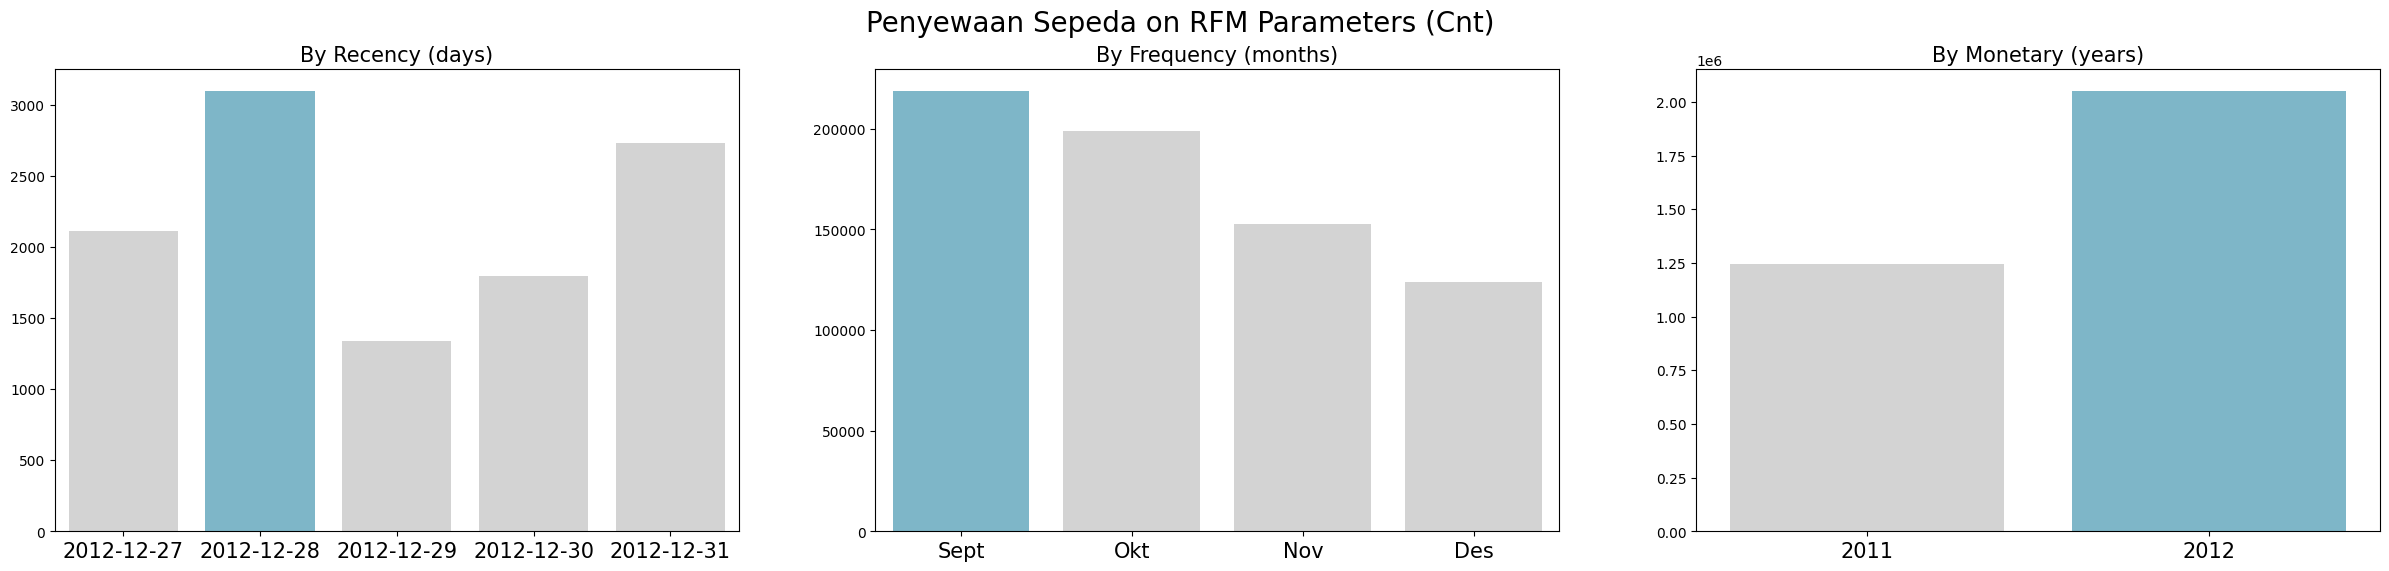

In [120]:
# Data Visualisasi
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
colors_recency = ["#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
colors_Frequency = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
colors_Monetary = ["#D3D3D3", "#72BCD4"]

# Recency
sns.barplot(y="cnt", x="dteday", data=recent_days_2012.sort_values(by="dteday", ascending=True), palette=colors_recency, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=15)
ax[0].tick_params(axis ='x', labelsize=15)

# Frequency
sns.barplot(y="cnt", x="mnth", data=recent_months_2012.sort_values(by="mnth", ascending=False), palette=colors_Frequency, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency (months)", loc="center", fontsize=15)
ax[1].tick_params(axis='x', labelsize=15)

# Monetary
sns.barplot(y="cnt", x="yr", data=years_rental.sort_values(by="yr", ascending=True), palette=colors_Monetary, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary (years)", loc="center", fontsize=15)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Penyewaan Sepeda on RFM Parameters (Cnt)", fontsize=20)
plt.show()

In [121]:
percent_years = ((year_rentals.loc[1, 'cnt'] - year_rentals.loc[0, 'cnt']) / year_rentals.loc[0, 'cnt']) * 100

print(f"Persen kenaikan penyewaan sepeda tahun 2011 ke 2012: {percent_years:.2f}%")


Persen kenaikan penyewaan sepeda tahun 2011 ke 2012: 64.88%


## Conclusion

- Conclution pertanyaan 1 :
Musim gugur menjadi musim dengan penyewaan sepeda tertinggi

- Conclution pertanyaan 2 :
Performa penyewaan sepeda meningkat sekitar 65% dari 1,243,103 di tahun 2011 menjadi 2,049,576 di tahun 2012